In [1]:
import pandas as pd
import re

import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

import keras
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import math
!pip install nltk
import nltk
import csv

df_train = pd.read_csv('Train.csv')
df_test = pd.read_csv('Test.csv')
df_val = pd.read_csv('Valid.csv')

2023-10-30 09:20:45.138471: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-10-30 09:20:45.276008: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-30 09:20:45.801012: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
import numpy as np
import pandas as pd
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split

In [3]:
df_train

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1
...,...,...
39995,"""Western Union"" is something of a forgotten cl...",1
39996,This movie is an incredible piece of work. It ...,1
39997,My wife and I watched this movie because we pl...,0
39998,"When I first watched Flatliners, I was amazed....",1


In [10]:
import string
df_train['text'] = df_train['text'].str.lower()
df_train['text'] = df_train['text'].apply(lambda x: ''.join([char for char in x if char not in string.punctuation]))
df_train['text'] = df_train['text'].apply((lambda x: re.sub('[^a-zA-z0-9\s]','',x)))
train = df_train['text'].tolist()

df_test['text'] = df_test['text'].str.lower()
df_test['text'] = df_test['text'].apply(lambda x: ''.join([char for char in x if char not in string.punctuation]))
df_test['text'] = df_test['text'].apply((lambda x: re.sub('[^a-zA-z0-9\s]','',x)))
text = df_test['text'].tolist()


df_val['text'] = df_val['text'].apply((lambda x: re.sub('[^a-zA-z0-9\s]','',x)))
val = df_val['text'].tolist()

In [ ]:
wordcloud = Word

/home/mca/anaconda3/envs/dse/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 133 (\x85) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/mca/anaconda3/envs/dse/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


In [13]:
max_words = 10000
tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(train)
vocab_size = len(tokenizer.word_index) + 1

In [15]:
sequences_train = tokenizer.texts_to_sequences(train)
sequences_test = tokenizer.texts_to_sequences(text)
sequences_val = tokenizer.texts_to_sequences(val)

In [27]:
test_list = list(df_train['text'][:10])
res = [(x, i.split()[j + 1]) for i in test_list 
       for j, x in enumerate(i.split()) if j < len(i.split()) - 1]
print("The formed bigrams are : " + str(res))

The formed bigrams are : [('i', 'grew'), ('grew', 'up'), ('up', 'b'), ('b', '1965'), ('1965', 'watching'), ('watching', 'and'), ('and', 'loving'), ('loving', 'the'), ('the', 'thunderbirds'), ('thunderbirds', 'all'), ('all', 'my'), ('my', 'mates'), ('mates', 'at'), ('at', 'school'), ('school', 'watched'), ('watched', 'we'), ('we', 'played'), ('played', 'thunderbirds'), ('thunderbirds', 'before'), ('before', 'school'), ('school', 'during'), ('during', 'lunch'), ('lunch', 'and'), ('and', 'after'), ('after', 'school'), ('school', 'we'), ('we', 'all'), ('all', 'wanted'), ('wanted', 'to'), ('to', 'be'), ('be', 'virgil'), ('virgil', 'or'), ('or', 'scott'), ('scott', 'no'), ('no', 'one'), ('one', 'wanted'), ('wanted', 'to'), ('to', 'be'), ('be', 'alan'), ('alan', 'counting'), ('counting', 'down'), ('down', 'from'), ('from', '5'), ('5', 'became'), ('became', 'an'), ('an', 'art'), ('art', 'form'), ('form', 'i'), ('i', 'took'), ('took', 'my'), ('my', 'children'), ('children', 'to'), ('to', 'see')

In [7]:
labels_train = pd.get_dummies(df_train['label']).values
labels_test = pd.get_dummies(df_test['label']).values
labels_val = pd.get_dummies(df_val['label']).values

In [8]:
max_review_length = 200 
sequences_train = pad_sequences(sequences_train, maxlen=max_review_length, padding='post', truncating='post')
sequences_test = pad_sequences(sequences_test, maxlen=max_review_length, padding='post', truncating='post')
sequences_val = pad_sequences(sequences_val, maxlen=max_review_length, padding='post', truncating='post')

In [9]:
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=128, input_length=max_review_length))
model.add(LSTM(128, return_sequences=False))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 128)          20515200  
                                                                 
 lstm (LSTM)                 (None, 128)               131584    
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 2)                 130       
                                                                 
Total params: 20655170 (78.79 MB)
Trainable params: 20655170 (78.79 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


2023-09-18 09:53:26.282638: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-09-18 09:53:26.298455: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-09-18 09:53:26.298817: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [10]:
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
history1 = model.fit(sequences_train,labels_train,epochs = 3, batch_size=32)

Epoch 1/3


2023-09-18 09:53:27.875979: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8600
2023-09-18 09:53:27.948750: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f5fd0088280 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-09-18 09:53:27.948773: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce GTX 1660 Ti, Compute Capability 7.5
2023-09-18 09:53:27.951541: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-09-18 09:53:28.017175: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1250/1250 [==============================] - 41s 32ms/step - loss: 0.6872 - accuracy: 0.5368
Epoch 2/3
1250/1250 [==============================] - 18s 15ms/step - loss: 0.6814 - accuracy: 0.5482
Epoch 3/3
1250/1250 [==============================] - 16s 12ms/step - loss: 0.6443 - accuracy: 0.6248


In [12]:
from tensorflow.keras.layers import Bidirectional,SimpleRNN
from tensorflow.keras.layers import GRU
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=128, input_length=max_review_length))
model.add(GRU(128, return_sequences=False))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 200, 128)          20515200  
                                                                 
 gru (GRU)                   (None, 128)               99072     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 2)                 130       
                                                                 
Total params: 20622658 (78.67 MB)
Trainable params: 20622658 (78.67 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
history2 = model.fit(sequences_train,labels_train,epochs = 3, batch_size=32)

Epoch 1/3
1250/1250 [==============================] - 35s 27ms/step - loss: 0.6332 - accuracy: 0.5880
Epoch 2/3
1250/1250 [==============================] - 16s 13ms/step - loss: 0.2754 - accuracy: 0.8898
Epoch 3/3
1250/1250 [==============================] - 15s 12ms/step - loss: 0.1861 - accuracy: 0.9301


In [14]:
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=128, input_length=max_review_length))
model.add(Bidirectional(SimpleRNN(128)))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='sigmoid'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 200, 128)          20515200  
                                                                 
 bidirectional (Bidirection  (None, 256)               65792     
 al)                                                             
                                                                 
 dense_4 (Dense)             (None, 64)                16448     
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 2)                 130       
                                                                 
Total params: 20597570 (78.57 MB)
Trainable params: 20597570 (78.57 MB)
Non-trainable params: 0 (0.00 Byte)
____________

In [15]:
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
history3 = model.fit(sequences_train,labels_train,epochs = 3, batch_size=32)

Epoch 1/3
1250/1250 [==============================] - 90s 71ms/step - loss: 0.6963 - accuracy: 0.5006
Epoch 2/3
1250/1250 [==============================] - 72s 57ms/step - loss: 0.6934 - accuracy: 0.4970
Epoch 3/3
1250/1250 [==============================] - 70s 56ms/step - loss: 0.7024 - accuracy: 0.4980


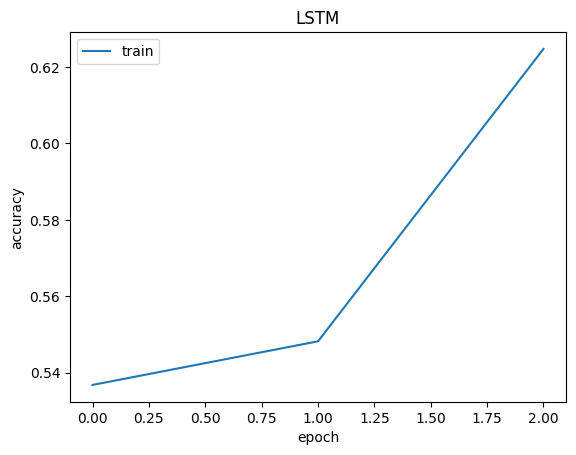

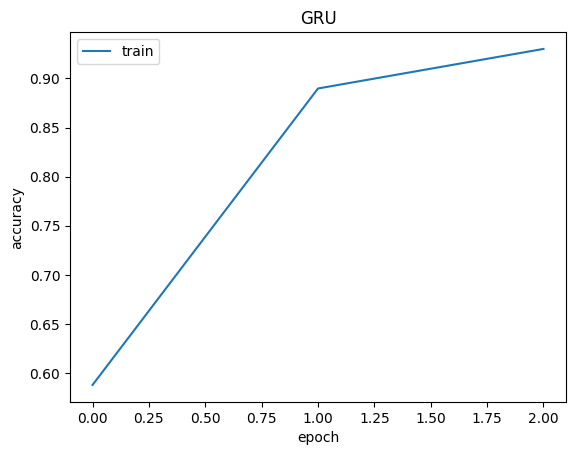

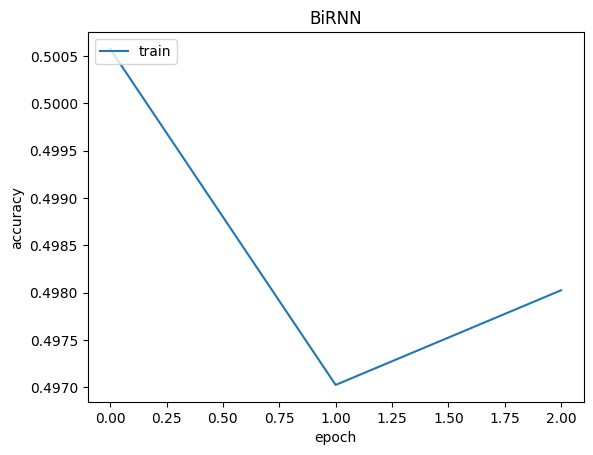

In [17]:
import matplotlib.pyplot as plt
plt.plot(history1.history['accuracy'])
plt.title('LSTM')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

plt.plot(history2.history['accuracy'])
plt.title('GRU')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

plt.plot(history3.history['accuracy'])
plt.title('BiRNN')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [21]:
review = ['I did not like it','It was good','Bad movie','Horrible movie','Best movie ever','My favourite movie',"I will watch it again",'Nice movie','I hate it',"I did not like it"]
label = [0,1,0,0,1,1,1,1,0,0]

df_train = pd.DataFrame({'text':review,'labels':label})
df_train['text'] = df_train['text'].str.lower()
df_train['text'] = df_train['text'].apply(lambda x: ''.join([char for char in x if char not in string.punctuation]))
df_train['text'] = df_train['text'].apply((lambda x: re.sub('[^a-zA-z0-9\s]','',x)))
train = df_train['text'].tolist()

In [24]:
sequences_train = tokenizer.texts_to_sequences(train)
labels_train = pd.get_dummies(df_train['labels']).values
max_review_length = 20
sequences_train = pad_sequences(sequences_train, maxlen=max_review_length, padding='post', truncating='post')

In [25]:
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=128, input_length=max_review_length))
model.add(LSTM(128, return_sequences=False))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='sigmoid'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 20, 128)           20515200  
                                                                 
 lstm_1 (LSTM)               (None, 128)               131584    
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 2)                 130       
                                                                 
Total params: 20655170 (78.79 MB)
Trainable params: 20655170 (78.79 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [32]:
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
history1 = model.fit(sequences_train,labels_train,epochs = 20, batch_size=1)

Epoch 1/20
10/10 [==============================] - 1s 24ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 2/20
10/10 [==============================] - 0s 10ms/step - loss: 0.0086 - accuracy: 1.0000
Epoch 3/20
10/10 [==============================] - 0s 11ms/step - loss: 0.0223 - accuracy: 1.0000
Epoch 4/20
10/10 [==============================] - 0s 10ms/step - loss: 3.4202e-04 - accuracy: 1.0000
Epoch 5/20
10/10 [==============================] - 0s 12ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 6/20
10/10 [==============================] - 0s 10ms/step - loss: 7.7572e-04 - accuracy: 1.0000
Epoch 7/20
10/10 [==============================] - 0s 11ms/step - loss: 7.6294e-07 - accuracy: 1.0000
Epoch 8/20
10/10 [==============================] - 0s 10ms/step - loss: 2.0849e-05 - accuracy: 1.0000
Epoch 9/20
10/10 [==============================] - 0s 10ms/step - loss: 7.4027e-06 - accuracy: 1.0000
Epoch 10/20
10/10 [==============================] - 0s 10ms/step - loss: 5.7220e-07 - ac

In [33]:
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=128, input_length=max_review_length))
model.add(GRU(128, return_sequences=False))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='sigmoid'))
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 20, 128)           20515200  
                                                                 
 gru_2 (GRU)                 (None, 128)               99072     
                                                                 
 dense_12 (Dense)            (None, 64)                8256      
                                                                 
 dropout_6 (Dropout)         (None, 64)                0         
                                                                 
 dense_13 (Dense)            (None, 2)                 130       
                                                                 
Total params: 20622658 (78.67 MB)
Trainable params: 20622658 (78.67 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [34]:
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
history2 = model.fit(sequences_train,labels_train,epochs = 20, batch_size=1)

Epoch 1/20
10/10 [==============================] - 1s 21ms/step - loss: 0.7148 - accuracy: 0.4000
Epoch 2/20
10/10 [==============================] - 0s 6ms/step - loss: 0.6933 - accuracy: 0.4000
Epoch 3/20
10/10 [==============================] - 0s 6ms/step - loss: 0.6946 - accuracy: 0.5000
Epoch 4/20
10/10 [==============================] - 0s 6ms/step - loss: 0.7075 - accuracy: 0.5000
Epoch 5/20
10/10 [==============================] - 0s 6ms/step - loss: 0.7233 - accuracy: 0.3000
Epoch 6/20
10/10 [==============================] - 0s 6ms/step - loss: 0.6999 - accuracy: 0.2000
Epoch 7/20
10/10 [==============================] - 0s 6ms/step - loss: 0.7147 - accuracy: 0.4000
Epoch 8/20
10/10 [==============================] - 0s 6ms/step - loss: 0.7023 - accuracy: 0.6000
Epoch 9/20
10/10 [==============================] - 0s 6ms/step - loss: 0.6788 - accuracy: 0.6000
Epoch 10/20
10/10 [==============================] - 0s 6ms/step - loss: 0.7187 - accuracy: 0.4000
Epoch 11/20
10/10 

In [35]:
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=128, input_length=max_review_length))
model.add(Bidirectional(SimpleRNN(128)))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='sigmoid'))
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 20, 128)           20515200  
                                                                 
 bidirectional_2 (Bidirecti  (None, 256)               65792     
 onal)                                                           
                                                                 
 dense_14 (Dense)            (None, 64)                16448     
                                                                 
 dropout_7 (Dropout)         (None, 64)                0         
                                                                 
 dense_15 (Dense)            (None, 2)                 130       
                                                                 
Total params: 20597570 (78.57 MB)
Trainable params: 20597570 (78.57 MB)
Non-trainable params: 0 (0.00 Byte)
____________

In [36]:
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
history3 = model.fit(sequences_train,labels_train,epochs = 20, batch_size=1)

Epoch 1/20
10/10 [==============================] - 1s 25ms/step - loss: 1.2103 - accuracy: 0.4000
Epoch 2/20
10/10 [==============================] - 0s 10ms/step - loss: 0.7482 - accuracy: 0.6000
Epoch 3/20
10/10 [==============================] - 0s 10ms/step - loss: 0.6154 - accuracy: 0.6000
Epoch 4/20
10/10 [==============================] - 0s 11ms/step - loss: 0.6011 - accuracy: 0.6000
Epoch 5/20
10/10 [==============================] - 0s 11ms/step - loss: 0.4457 - accuracy: 0.9000
Epoch 6/20
10/10 [==============================] - 0s 12ms/step - loss: 0.2557 - accuracy: 1.0000
Epoch 7/20
10/10 [==============================] - 0s 14ms/step - loss: 0.1842 - accuracy: 1.0000
Epoch 8/20
10/10 [==============================] - 0s 11ms/step - loss: 0.0383 - accuracy: 1.0000
Epoch 9/20
10/10 [==============================] - 0s 11ms/step - loss: 0.0032 - accuracy: 1.0000
Epoch 10/20
10/10 [==============================] - 0s 11ms/step - loss: 0.0038 - accuracy: 1.0000
Epoch 11/

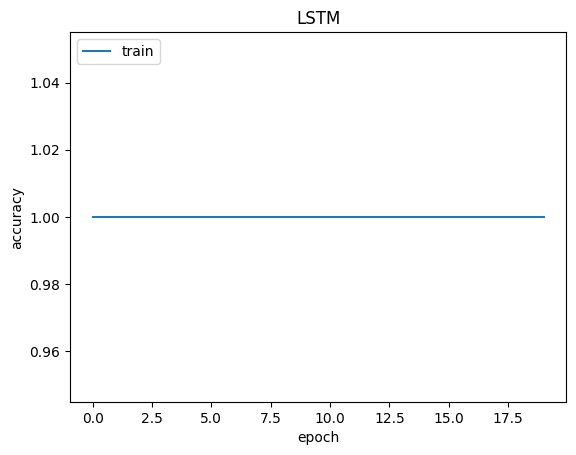

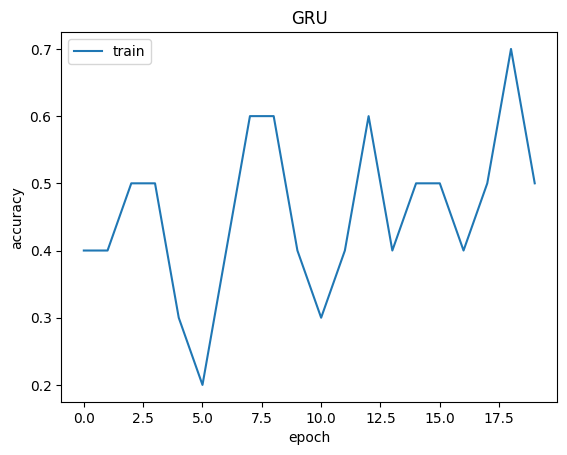

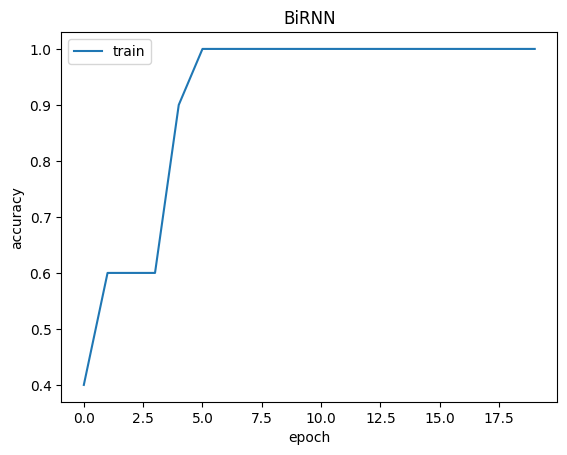

In [37]:
plt.plot(history1.history['accuracy'])
plt.title('LSTM')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

plt.plot(history2.history['accuracy'])
plt.title('GRU')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

plt.plot(history3.history['accuracy'])
plt.title('BiRNN')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()